# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Ratios from Fundamental Data

In this notebook, you will learn what fundamental ratios are and why they are important. You will learn how they help in analysing the fundamental data for a company. You will learn to calculate fundamental ratios such as the return on equity (RoE) and current ratio. The ratios can be calculated using the fundamental data of the company fetched in the previous notebook.

You will calculate the following ratios:
1. [Current Ratio](#current_ratio)
1. [Return on Equity (ROE)](#roe)
1. [Debt to Equity (D/E) Ratio](#der)

Note: `simfin` is a third party library and is not maintained by QuantInsti. At times, downloading the data may give you errors due to changes in simfin library.

In such cases, it is recommended to upgrade the simfin package.

In [ ]:
# Update to the latest simfin library version
!pip install --upgrade simfin

## Import Libraries

In [2]:
# Import the SimFin library
import simfin as sf

# Import the names used for easy access to SimFin's data-columns
from simfin.names import *

# Import time manipulation library
from datetime import timedelta

# Import data manipulation library
import pandas as pd

# Import matplotlib and set the style for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id='data'></a> 
## Stock Fundamental Data

The fundamental data for stocks is fetched from the `simfin` library. The `simfin` library currently provides data for stocks from the US and Germany. For this illustration, we will use the stocks in the US market. The free dataset from [SimFin](https://simfin.com/data/bulk) will be used in this notebook.

<a id='data'></a> 
## Getting  the simfin API key

To get the free simfin API key, register your email id at https://simfin.com/. Confirm your email id by clicking on the link in the email shared by the simfin team. This will activate the free API key. Login to the simfin account and go to https://simfin.com/data/api to access the free API key.

The below code fetches the simfin API key of quantra using the get_simfin_api_key method of the FMDA_quantra module. However, while running the code on your local machine, you are requested to replace the API key placeholder text with the actual API key in the file FMDA_quantra.py. 

This file needs to be in the same folder as the current working directory, which is usually the folder where your notebook is being run from.

In [3]:
# Import libraries
import os
import sys
sys.path.append("..")

# Import the get_simfin_api_key from the FMDA_quantra module
# The code of this module can be found in the downloads (last section) of this course
# You need to edit FMDA_quantra.py file in the folder 'data_modules' and add your simfin API key manually before you continue
from data_modules.FMDA_quantra import get_simfin_api_key

# Method in FMDA_quantra module to get the simfin API key
simfin_api_key = get_simfin_api_key()

In [4]:
# SimFin data-directory
sf.set_data_dir('~/simfin_data/')

# SimFin API key
sf.config.set_api_key(api_key=simfin_api_key)

## Define the Stock Ticker and Fetch Fundamental Data

Define the asset ticker symbol for which the ratios will be calculated.

In [5]:
# Set the market as US
market = 'us'

# Define the stock ticker
stock_ticker = 'AAPL'

# Fetch quarterly income statements for all the tickers in SimFin database
income_data_simfin_all_stocks = sf.load_income(variant='quarterly', market=market)
income_data = income_data_simfin_all_stocks.loc[stock_ticker,:]

# Fetch quarterly balance sheet data for all the tickers in SimFin database
balance_sheet_data = sf.load_balance(variant='quarterly', market=market)
balance_sheet_data = balance_sheet_data.loc[stock_ticker,:]

# Fetch quarterly cash flow data for all the tickers in SimFin database
cash_flow_data = sf.load_balance(variant='quarterly', market=market)
cash_flow_data = cash_flow_data.loc[stock_ticker,:]

Dataset "us-income-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-balance-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-balance-quarterly" on disk (0 days old).
- Loading from disk ... Done!


<a id='current_ratio'></a> 
## Current Ratio

The current ratio is a liquidity ratio that measures a company's ability to pay short-term obligations. For an investor, a very high current ratio is not a good indicator because that indicates that the company is not using its current assets efficiently. A current ratio of less than 1 is also not a good sign because that indicates that the company may have problems meeting its short term obligations.

The current ratio is calculated as:
$$\text{Current ratio} = \frac{\text{Total Current Assets}}{\text{Total Current Liabilities}}$$

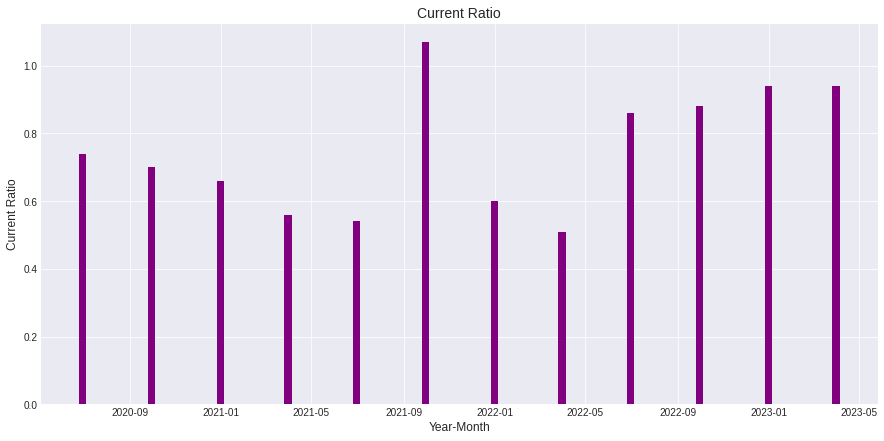

In [6]:
# Calculate the current ratio
current_ratio = \
    round((balance_sheet_data['Total Current Assets']
           / balance_sheet_data['Total Current Liabilities']).astype(float), 2)

# Plot the current ratio for the last 3 years
data_to_plot = current_ratio.tail(12)
X = data_to_plot.index
plt.figure(figsize=(15, 7))

# Plot the bar chart
plt.bar(X, data_to_plot, color='purple', width=10, label="Current Ratio")

# Set title and labels for the plot
plt.title('Current Ratio', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Current Ratio', fontsize=12)
plt.show()

<a id='roe'></a> 
## Return on Equity (ROE)

The return on equity (ROE) is a measure of the profitability of a business with respect to its equity. Usually, the larger the ROE is, the better it is for the company.

The return on equity is calculated as:
$$\text{Return on equity (ROE) (%)} = \frac{\text{Net Income}}{\text{Total Equity}} * 100$$

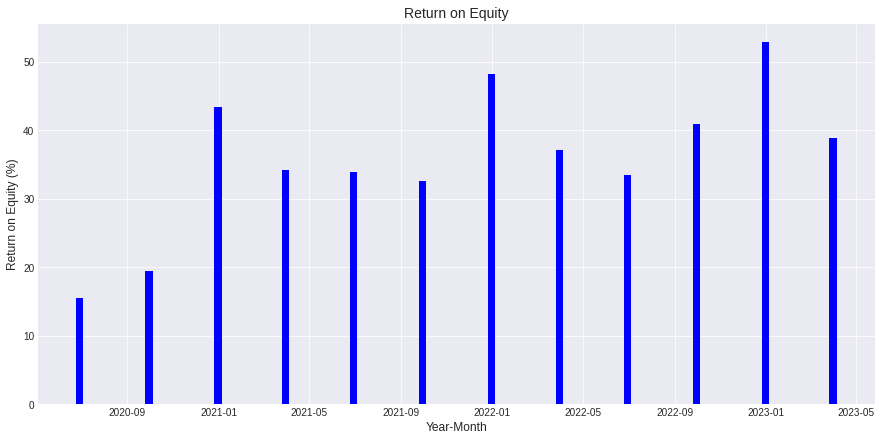

In [7]:
# Calculate the return on equity
return_on_equity = \
    round((income_data['Net Income'] / balance_sheet_data['Total Equity'] * 100).astype(float), 2)

# Plot the return on equity for the last 3 years
data_to_plot = return_on_equity.tail(12)
X = data_to_plot.index
plt.figure(figsize=(15, 7))

# Plot the bar chart
plt.bar(X, data_to_plot, color = 'blue', width = 10, label="Return on Equity")

# Set title and labels for the plot
plt.title('Return on Equity', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Return on Equity (%)', fontsize=12)
plt.show()

<a id='der'></a> 
## Debt to Equity (D/E) Ratio

The debt to equity (D/E) ratio is a fundamental ratio indicating the relative proportion of shareholders' equity and debt used to finance a company's assets. The ratio is also known as risk, gearing or leverage. A high D/E ratio is considered risky because it suggests that the company is financing a significant amount of its potential growth through borrowing.

The debt to equity ratio is calculated as:
$$\text{Debt to Equity Ratio (D/E)} = \frac{\text{Long Term Debt}}{\text{Total Equity}}$$

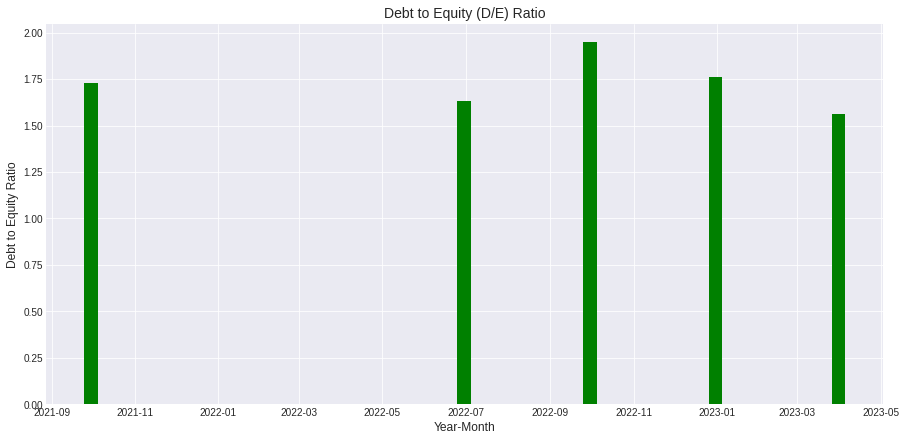

In [8]:
# Calculate the debt to equity ratio
de_ratio = \
    round((balance_sheet_data['Long Term Debt'] / balance_sheet_data['Total Equity']).astype(float), 2)

# Plot the debt to equity for the last 3 years
data_to_plot = de_ratio.tail(12)
X = data_to_plot.index
plt.figure(figsize=(15, 7))

# Plot the bar chart
plt.bar(X, data_to_plot, color = 'green', width = 10, label="Debt to Equity (D/E) Ratio")

# Set title and labels for the plot
plt.title('Debt to Equity (D/E) Ratio', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Debt to Equity Ratio', fontsize=12)
plt.show()

In a similar fashion, you can calculate other fundamental ratios on your own and observe the pattern.

In the upcoming notebook, you will learn to fetch other fundamental data for a company.
<br><br>